

Per il coach che correggera' questo progetto:

1. Il progetto viene mostrato seguendo la pipeline standard, dall'import alla discussione finale. Ho inserito alcuni capitoli iniziali con delle funzioni costruite da me. Ognuna ha un'accurata documentazione. In particolare:

- (A): contiene installazioni ed imports necessari, compresa la riproducibilita';


- (B1): contiene tutto ciò che è necessario per eseguire il training di algoritmi SARSA e Q-learning;

- (B2): contiene tutto ciò che è necessario per eseguire il training di algoritmi DDQN e DQN;

2. Ho impostato il notebook in modo estremamente didattico, con spiegazioni dettagliate di ogni passaggio (probabilmente spiegazioni ridondanti, ma meglio abbondare in questo contesto).

3. L'approccio metodologico studia approfonditamente l'environment proposto, per poi scegliere una versione di Random Attack e Maximal Attack particolarmente competitiva. Oltre agli algoritmi richiesti dal progetto (SARSA e DQN) vengono provati per scrupolo anche i loro parenti stretti (Q-learning e DQN) Questo perche' e' molto facile scrivere una funzione che possa fare allo stesso tempo, per esempio, SARSA e Q-learning.

4. Sono consapevole che le funzioni scritte manualmente da me potrebbero essere rese molto piu' robuste (ulteriori controlli sugli input, type hints piu' forti, eccetera), ma ho comunque messo documentazione tramite docstring ed alcuni type hints. Per tenere il progetto autoconsistente ma senza esagerare, ho usato definizioni funzionali al contesto e che possono essere riutilizzate in molti altri contesti;

5. Il notebook è stato sviluppato in modo da poter essere rieseguito integralmente dall’inizio senza errori o dipendenze esterne, ed inoltre i risultati sono (il piu' possibile) riproducibili, grazie al capitolo A).

# A) Imports, reproducibility

In [1]:
!pip install swig
!pip install gymnasium
!pip install gymnasium[box2d]
!pip install gymnasium[classic-control]
!pip install scikit-learn && pip install --no-deps gym_idsgame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2399002 sha256=4bf0816b67b7f7a3b6046cae467c958fef3d3698f01f496709030c54de42234f
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gym_idsgame: filename=gym_idsgame-1.0.13-py3-none-any.whl size=969599 sha256=11e6b804c11a99ff76b47f2a2ec9c0a96d68a096a78929d2c1067441e4450afd
  Stored in directory: /root/.cache/pip/wheels/bb/cd/79/f439cc0b004b731a95ba5d840771ebca2bc9f8c958fcb91463
Successfully built gym_idsgame


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, os
from collections import deque
from tqdm import tqdm
from typing import Callable, Optional

import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import torch
import torch.nn as nn
import torch.optim as optim

cuda_available = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_available else "cpu")

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed);
if cuda_available:
  torch.cuda.manual_seed_all(seed)

from gym_idsgame.envs import (
    IdsGameRandomAttackV0Env,
    IdsGameRandomAttackV1Env,
    IdsGameRandomAttackV2Env,
    IdsGameRandomAttackV3Env,
    IdsGameRandomAttackV4Env,
    IdsGameRandomAttackV5Env,
    IdsGameRandomAttackV6Env,
    IdsGameRandomAttackV7Env,
    IdsGameRandomAttackV8Env,
    IdsGameRandomAttackV9Env,
    IdsGameRandomAttackV10Env,
    IdsGameRandomAttackV11Env,
    IdsGameRandomAttackV12Env,
    IdsGameRandomAttackV13Env,
    IdsGameRandomAttackV14Env,
    IdsGameRandomAttackV15Env,
    IdsGameRandomAttackV16Env,
    IdsGameRandomAttackV17Env,
    IdsGameRandomAttackV18Env,
    IdsGameRandomAttackV19Env,
    IdsGameRandomAttackV20Env,
    IdsGameRandomAttackV21Env)

from gym_idsgame.envs import (
    IdsGameMaximalAttackV0Env,
    IdsGameMaximalAttackV1Env,
    IdsGameMaximalAttackV2Env,
    IdsGameMaximalAttackV3Env,
    IdsGameMaximalAttackV4Env,
    IdsGameMaximalAttackV5Env,
    IdsGameMaximalAttackV6Env,
    IdsGameMaximalAttackV7Env,
    IdsGameMaximalAttackV8Env,
    IdsGameMaximalAttackV9Env,
    IdsGameMaximalAttackV10Env,
    IdsGameMaximalAttackV11Env,
    IdsGameMaximalAttackV12Env,
    IdsGameMaximalAttackV13Env,
    IdsGameMaximalAttackV14Env,
    IdsGameMaximalAttackV15Env,
    IdsGameMaximalAttackV16Env,
    IdsGameMaximalAttackV17Env,
    IdsGameMaximalAttackV18Env,
    IdsGameMaximalAttackV19Env,
    IdsGameMaximalAttackV20Env,
    IdsGameMaximalAttackV21Env)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# B1): SARSA

Qui sono presenti tutte le funzioni utili per la parte 2a). In particolare, la fuzione `Q_SARSA()` implementa contemporaneamente Q-learning e SARSA, così da poter tentare piu' approcci.

In [73]:
def encode_state(state_matrix: np.ndarray):
    """
    Args:
      - state_matrix: a numpy matrix with shape (2,3) and values in {0,1,2}.
    Return: a unique value (integer) representing the state.
    """
    flat_state = state_matrix.flatten() # shape (6, )
    index, power = 0, 1
    for value in reversed(flat_state):
        index += value * power
        power *= 3

    return int(index)

In [74]:
def select_action(epsilon: float, current_state: int,
                  Q: np.ndarray, n_actions: int):
  """
  Args:
    - epsilon: value of epsilon of the epsilon-greedy procedure.
    - current_state: index of the current state.
    - Q: np array with shape [n_actions, n_states]
    - n_actions: number of possible actions in the environment.
  Return: chosen action according to epsilon-greedy.
  """
  if random.uniform(0,1) < epsilon:
    action = random.randrange(n_actions) # a casual action a_i^k (exploration)
  else:
    action = np.argmax(Q[:, current_state]) # the most prob. action according to Q-matrix
  return action

In [75]:
def Q_update(current_state: int, action: np.ndarray,
             Q: np.ndarray, next_state: int, reward: np.ndarray,
             gamma: float, eta: float):
  """
  Args:
    - Q: np array with shape [n_actions, n_states]
    - gamma: discount factor.
    - eta = learning rate of the Q-learning algorithm.
  Return: updated value of Q matrix
  """
  the_max = np.max(Q[:, next_state])
  correction = reward + gamma * the_max - Q[action, current_state]
  Q[action, current_state] = Q[action, current_state] + eta * correction
  return Q

In [76]:
def SARSA_update(current_state: int, action: np.ndarray, action_prime: np.ndarray,
                 Q: np.ndarray, next_state: int, reward: np.ndarray,
                 gamma: float, eta: float):
  """
  Args:
    - Q: np array with shape [n_actions, n_states]
    - gamma: discount factor.
    - eta = learning rate of the Q-learning algorithm.
  Return: updated value of Q matrix
  """
  correction = reward + gamma * Q[action_prime, next_state] - Q[action, current_state]
  Q[action, current_state] = Q[action, current_state] + eta * correction
  return Q

In [77]:
def Q_SARSA(env, n_max_episodes: int, epsilon: float, gamma: float,
            eta: float, theta: float = 1e-6, decay: float = 0.995,
            off_policy: bool = True, verbose: bool = False,
            reward_shaper: Optional[Callable] = None):
  """
  Args:
    - env: a Gymnasium environment.
    - n_max_episodes: max number of training episodes.
    - epsilon: starting value of epsilon for the epsilon decay.
    - gamma: discount factor.
    - eta = learning rate of the Q-learning algorithm.
    - theta = inferior limit for convergence (default 1e-6).
    - decay: used in epsilon decay as epsilon = max(0.01, epsilon * decay).
    - off_policy: if True, it uses the Q-learning algorithm, otherwise SARSA.
    - verbose: if True, prints the number of steps done to conclude an episode as a metric.
    - reward_shaper: function that implements reward shaping, given current_state, action,
                     next_state, reward, terminated.
  Return: Q, best_policy, episode
  """
  n_states = 729
  n_actions = env.action_space.n
  Q = np.zeros((n_actions, n_states)) # this is Q^{t}(a_i^k, S_k)
  episode = 1
  while True:
    q = Q.copy()
    current_state, _ = env.reset()
    current_state = current_state.copy()
    current_state_idx = encode_state(current_state)
    k = 0
    total_rewards = 0.0
    action = select_action(epsilon, current_state_idx, Q, n_actions)
    while True:
      next_state, reward, terminated, truncated, _ = env.step(action)
      next_state_idx = encode_state(next_state)
      # stall_penalty = 0
      # if np.array_equal(current_state, next_state):
      #  stall_penalty = -0.1
      #  if verbose and k % 10 == 0:
      #       print(f"Stall (for {k} steps) with action {action}.")
      action_prime = select_action(epsilon, next_state_idx, Q, n_actions)
      """Reward Shaping"""
      if reward_shaper is not None:
          reward = reward_shaper(current_state, action, next_state, reward, terminated)
      # reward += stall_penalty
      total_rewards += reward
      """Q or SARSA update"""
      if off_policy:
        Q = Q_update(current_state_idx, action, Q, next_state_idx, reward, gamma, eta)
      else:
        Q = SARSA_update(current_state_idx, action, action_prime, Q, next_state_idx, reward, gamma, eta)
      action = action_prime
      current_state = next_state.copy()
      current_state_idx = next_state_idx
      if terminated or truncated:
        break
      k += 1
    if verbose:
      print(f"Episode {episode} ended with {k+1} steps and {total_rewards} rewards.")
    """now Q is the Q of episode 'mu+1': Q^{mu+1}"""
    max_change = np.max(np.abs(Q-q))
    if episode % 250 == 0:
        print(f"Episode {episode}: max Q-change = {np.round(max_change,6)}")
    convergence = max_change < theta
    if (convergence and episode > 2000) or episode >= n_max_episodes: # a 2000 step warmup is always required
      break
    episode += 1
    epsilon = max(0.01, epsilon * decay) # epsilon-decay. Leave always a minimum epsilon
  best_policy = np.argmax(Q, axis = 0)

  return Q, best_policy, episode

In [78]:
def evaluate_policy(env, policy: np.ndarray, victory_logic, n_episodes: int = 1000):
  """
  Args:
    - env: Gym environment.
    - policy: policy to be evaluated.
    - victory_logic: the logic to decrete a victory (function).
    - n_episodes: total number of episodes on which compute success rate.
  Return: success_rate
  """
  rng = np.random.default_rng(seed)
  eval_seeds = rng.integers(0, 1000000, size = n_episodes)
  wins = 0
  for i in tqdm(range(n_episodes)):
    current_seed = int(eval_seeds[i])
    state, _ = env.reset(seed = current_seed)
    state = encode_state(state)
    terminated, truncated = False, False
    episode_reward = 0.0
    while not (terminated or truncated): # this while runs an entire episode
      action = policy[state]
      next_state, reward, terminated, truncated, _ = env.step(action)
      episode_reward += reward
      next_state = encode_state(next_state)
      state = next_state
    if victory_logic(episode_reward, terminated, truncated):
      wins += 1
  success_rate = (wins / n_episodes) * 100
  return success_rate

# B2): DQN

Qui sono presenti tutte le funzioni utili per la parte 2b). In particolare, la fuzione `Q_net()` implementa contemporaneamente DQN e DDQN, così da poter tentare piu' approcci.

In [79]:
class ReplayBuffer:
  def __init__(self, buffer_max_dim: int):
    self.buffer = deque(maxlen = buffer_max_dim)
  def push(self, state, action, reward, next_state, done):
    self.buffer.append((state, action, reward, next_state, done))
  def __len__(self):
    return len(self.buffer)
  def sample(self, batch_size: int):
    # each element of the following gives a list of all the states, ..., ... in the batch
    states, actions, rewards, next_states, dones = zip(*random.sample(self.buffer, batch_size))
    states = np.array(states) # shape: [batch_size, shape of the states]
    actions = np.array(actions)
    rewards = np.array(rewards)
    next_states = np.array(next_states)
    dones = np.array(dones)
    return (states, actions, rewards, next_states, dones)
  def __str__(self):
    output = "Content of the Replay Buffer:\n"
    for i in range(len(self.buffer)):
      output += f"Entry {i}: {self.buffer[i]}\n"
    return output

In [80]:
def select_action_DQN(epsilon: float, current_state: np.ndarray,
                      policy_net: nn.Module, n_actions: int):
  """
  Args:
    - epsilon: value of epsilon of the epsilon-greedy procedure.
    - current_state: np array or list.
    - policy_net: PyTorch model.
    - n_actions: number of possible actions in the environment.
  Return: chosen action according to epsilon-greedy.
  """
  if random.uniform(0,1) < epsilon:
    action = random.randrange(n_actions) # do not use 'env', this is more general
  else:
    current_state = torch.FloatTensor(current_state).unsqueeze(0).to(device) # add batch dim
    policy_net.eval()
    with torch.no_grad():
      logitshat = policy_net(current_state) # shape: [1, n_actions]
      action = torch.argmax(logitshat, axis = 1).item() # argmax along relevant axis
  return action

In [81]:
def train_model(policy_net: nn.Module, target_net: nn.Module, # neural nets
                loss_fn: torch.nn, optimizer: torch.optim, # training properties of the nets
                replay_buffer: ReplayBuffer, # replay buffer
                batch_size: int, gamma: float, # hyperparameters
                DQN: bool = True): # type of algorithm
  """
  DQN: if True, the functions trains the net using the DQN algorithm, otherwise the DDQN one.
  """
  if len(replay_buffer) < batch_size: # train only after the batch_size steps
    return
  current_states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size) # taken casually

  current_states = torch.tensor(current_states, # shape: [batch_size, shape of the states]
                                dtype = torch.float32,
                                device = device)
  actions = torch.tensor(actions, dtype = torch.int64, device = device) # integers for the actions
  rewards = torch.tensor(rewards, dtype = torch.float32, device = device)
  next_states = torch.tensor(next_states, dtype = torch.float32, device = device)
  dones = torch.tensor(dones, dtype = torch.float32, device = device)

  policy_net.train()
  target_net.eval()

  logitshat_policy_current = policy_net(current_states) # logitshat.shape: [batch_size, num_actions]
  # haty = logitshat[:, actions] # this is wrong
  haty = logitshat_policy_current.gather(1, actions.unsqueeze(1)).squeeze(1) # haty.shape: [batch_size]
  with torch.no_grad():
    logitshat_target_next = target_net(next_states) # shape: [batch_size, num_actions]
    if DQN:
      y = rewards + gamma * torch.max(logitshat_target_next, axis = 1)[0] * (1 - dones) # y.shape: [batch_size]
    else:
      policy_net.eval() # for future predictions, it is more coherent to use both target and policy in .eval() mode
      logitshat_policy_next = policy_net(next_states) # shape: [batch_size, num_actions]
      barj = torch.argmax(logitshat_policy_next, axis = 1) # shape: [batch_size]
      selected_haty = logitshat_target_next.gather(1, barj.unsqueeze(1)).squeeze(1) # shape: [batch_size]
      y = rewards + gamma * selected_haty * (1 - dones)

  loss = loss_fn(haty, y) # to give the possibility of using other norms
  optimizer.zero_grad()
  loss.backward()
  torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100) # for stability
  optimizer.step()

In [82]:
def Q_net(policy_net: nn.Module, target_net: nn.Module, replay_buffer: ReplayBuffer, # structure
          env, n_actions: int, epsilon: float, gamma: float, # environment properties
          loss_fn: torch.nn, optimizer: torch.optim, # training properties of the nets
          num_episodes: int, batch_size: int, target_update: int, decay: float, # training hyperpar
          DQN: bool = True, verbose = False): # type of algorithm
  """
  Args:
    - env: a Gymnasium environment.
    - epsilon: starting value of epsilon.
    - gamma: discount factor.
    - loss_fn: usually torch.nn.MSELoss().
    - num_episodes: number of epsiodes of training.
    - target_update: update the target net each target_update steps.
    - decay: used in epsilon decay as epsilon = max(0.01, epsilon * decay).
    - DQN: if True, the functions trains the net using the DQN algorithm, otherwise the DDQN one.
    - verbose: if True, prints the number of steps done to conclude an episode as a metric.
  Return: policy_net, target_net, episode_rewards
  """
  target_net.eval()
  total_steps_done = 0 # total steps done across episodes, useful to update the target net
  episode_rewards = [] # to monitor the agent progress
  for episode in tqdm(range(1, num_episodes + 1)):
    current_state, _ = env.reset()
    k = 0
    episode_total_reward = 0.0 # total rewards in an episode
    while True: # step cycle, index k
      action = select_action_DQN(epsilon, current_state, policy_net, n_actions)
      next_state, reward, terminated, truncated, _ = env.step(action)
      if (terminated or truncated) and reward <= 0: # reward shaping
        reward = -0.1
      episode_total_reward += reward
      replay_buffer.push(current_state, action, reward, next_state, terminated or truncated)
      train_model(policy_net, target_net, loss_fn, optimizer,
                  replay_buffer, batch_size, gamma, DQN)
      if total_steps_done % target_update == 0: # every target_update steps, update target_net
        target_net.load_state_dict(policy_net.state_dict())
      if terminated or truncated:
        break
      k += 1
      total_steps_done += 1
      current_state = next_state
    if verbose:
      print(f"Episode {episode} ended with {k+1} steps and total reward {episode_total_reward}.")
    epsilon = max(0.01, epsilon * decay)
    episode_rewards.append(episode_total_reward)
  return policy_net, target_net, episode_rewards

In [83]:
def evaluate_model(env, model: nn.Module, victory_logic, n_episodes: int = 1000):
  """
  Args:
    - env: Gym environment.
    - model: the model that produces the policy to be evaluated.
    - victory_logic: the logic to decrete a victory (function).
    - n_episodes: total number of episodes on which compute success rate.
  Return: success_rate
  """
  wins = 0
  rng = np.random.default_rng(seed)
  eval_seeds = rng.integers(0, 1000000, size = n_episodes)
  model.eval()

  for i in tqdm(range(n_episodes)):
    current_seed = int(eval_seeds[i])
    current_state, _ = env.reset(seed=current_seed)
    terminated, truncated = False, False
    episode_reward = 0.0
    while not (terminated or truncated):
      current_state = torch.tensor(current_state, dtype = torch.float32, device = device).unsqueeze(0)
      with torch.no_grad():
          Q = model(current_state)
      action = torch.argmax(Q).item()
      next_state, reward, terminated, truncated, _ = env.step(action)
      episode_reward += reward
      current_state = next_state
    if victory_logic(episode_reward, terminated, truncated):
      wins += 1
  success_rate = (wins / n_episodes) * 100
  return success_rate

# 1) Environment Exploration

Useremo due modalita':
1. 'Random Attack' (usando SARSA e DDQN): l'agente difende e l'attacker segue una strategia d'attacco randomica.
2. 'Maximal Attack' (usando DDQN): l'agente difende e l'attacker segue una strategia d'attacco in cui attacca lo stato $S_k$ con il massimo valore $V(S_k)$ tra i (suoi, dell'attacker) primi vicini.

Dato che siamo qui interessati ad addestrare l'agente come difensore dagli attacchi informatici, prendiamo il punto di vista della sola difesa:

In [14]:
class IDSGameWrapper:
  """
  Wrapper of the gym_idsgame.envs to focus only of the defender agent. This
  transforms the double-agent problem into a single-agent RL problem. The wrapper
  can be used also on a standard gym environment.
  """
  def __init__(self, env):
    self.env = env
    self.num_states = env.num_states
    self.action_space = env.defender_action_space
    self.render = env.render
    self.observation_space  = 0

  def reset(self, seed: int = None):
    """
    Return: only 'current_state' of the defender agent.
    """
    if seed is not None and hasattr(self.env, 'seed'):
      self.env.seed(seed) # set the seed of the environment
    current_state = self.env.reset()

    if isinstance(current_state, tuple):
      current_state = current_state[1]
      self.observation_space = current_state.shape[0]
      return current_state, {}
    else:
      self.observation_space = current_state.shape[0]
      return current_state, {}

  def step(self, defender_action: int):
    """
    The gym_idsgame expect as 'action' for 'env.step(action)' a tuple
    '(attacker_action, defender_action'). This function uses a fixed action
    with dummy variable '-1' for the attcker. Then, it focuses only on the
    defender results.
    """
    index_of_max_action = self.action_space.n - 1
    # clip of the action. useful if defender_action is out of range:
    defender_action = min(defender_action, index_of_max_action)
    try:
        res = self.env.step(defender_action)
    except Exception:
        res = self.env.step((None, defender_action))

    if len(res) == 4:
      next_state, reward, terminated, info = res
      truncated = False
    elif len(res) == 5:
      next_state, reward, terminated, truncated, info = res

    if isinstance(next_state, tuple):
      next_state = next_state[1] # take only defender part
    if isinstance(reward, tuple):
      reward = reward[1] # take only defender part

    return next_state, reward, terminated, truncated, info

Per avere un'idea del comportamento dell'ambiente, proviamo a vedere cosa succede prendendo azioni del tutto casuali:

In [15]:
def baseline_results(game: str, version_dict: dict, seed: int):
  print(f"\n\t\t   GAME: {game}")
  for version_number, version_class in version_dict.items():
    print("\n","-"*20, f" Version {version_number} ", "-"*20, "\n")
    env = IDSGameWrapper(version_class())
    version_total_steps = []
    version_rewards = []
    for episode in range(1, 51):
      current_state, _ = env.reset(seed+episode)
      total_reward_of_episode = 0.0
      k = 1
      while True: # step cycle, index k
        action = env.action_space.sample()
        _, reward, terminated, truncated, _ = env.step(action)
        total_reward_of_episode += reward
        if terminated or truncated:
          break
        k += 1

      version_total_steps.append(k)
      version_rewards.append(total_reward_of_episode)
      print(f"#### episode {episode}: mean steps = {np.mean(version_total_steps)} ||| mean rewards = {np.mean(version_rewards)}")

random_versions = {
    "V0": IdsGameRandomAttackV0Env,
    "V1": IdsGameRandomAttackV1Env,
    "V2": IdsGameRandomAttackV2Env,
    "V3": IdsGameRandomAttackV3Env,
    "V4": IdsGameRandomAttackV4Env,
    "V5": IdsGameRandomAttackV5Env,
    "V6": IdsGameRandomAttackV6Env,
    "V7": IdsGameRandomAttackV7Env,
    "V8": IdsGameRandomAttackV8Env,
    "V9": IdsGameRandomAttackV9Env,
    "V10": IdsGameRandomAttackV10Env,
    "V11": IdsGameRandomAttackV11Env,
    "V12": IdsGameRandomAttackV12Env,
    "V13": IdsGameRandomAttackV13Env,
    "V14": IdsGameRandomAttackV14Env,
    "V15": IdsGameRandomAttackV15Env,
    "V16": IdsGameRandomAttackV16Env,
    "V17": IdsGameRandomAttackV17Env,
    # "V18": IdsGameRandomAttackV18Env,
    # "V19": IdsGameRandomAttackV19Env,
    # "V20": IdsGameRandomAttackV20Env,
    # "V21": IdsGameRandomAttackV21Env
    }

maximal_versions = {
    "V0": IdsGameMaximalAttackV0Env,
    "V1": IdsGameMaximalAttackV1Env,
    "V2": IdsGameMaximalAttackV2Env,
    "V3": IdsGameMaximalAttackV3Env,
    "V4": IdsGameMaximalAttackV4Env,
    "V5": IdsGameMaximalAttackV5Env,
    "V6": IdsGameMaximalAttackV6Env,
    "V7": IdsGameMaximalAttackV7Env,
    "V8": IdsGameMaximalAttackV8Env,
    "V9": IdsGameMaximalAttackV9Env,
    "V10": IdsGameMaximalAttackV10Env,
    "V11": IdsGameMaximalAttackV11Env,
    "V12": IdsGameMaximalAttackV12Env,
    "V13": IdsGameMaximalAttackV13Env,
    "V14": IdsGameMaximalAttackV14Env,
    "V15": IdsGameMaximalAttackV15Env,
    "V16": IdsGameMaximalAttackV16Env,
    "V17": IdsGameMaximalAttackV17Env,
    # "V18": IdsGameMaximalAttackV18Env,
    # "V19": IdsGameMaximalAttackV19Env,
    # "V20": IdsGameMaximalAttackV20Env,
    # "V21": IdsGameMaximalAttackV21Env
    }

baseline_results("Random Attack", random_versions, seed)
baseline_results("Maximal Attack", maximal_versions, seed)



		   GAME: Random Attack

 --------------------  Version V0  -------------------- 

#### episode 1: mean steps = 2.0 ||| mean rewards = 1.0
#### episode 2: mean steps = 2.5 ||| mean rewards = 1.0
#### episode 3: mean steps = 2.3333333333333335 ||| mean rewards = 1.0
#### episode 4: mean steps = 2.5 ||| mean rewards = 1.0
#### episode 5: mean steps = 2.4 ||| mean rewards = 1.0
#### episode 6: mean steps = 2.6666666666666665 ||| mean rewards = 1.0
#### episode 7: mean steps = 2.4285714285714284 ||| mean rewards = 1.0
#### episode 8: mean steps = 2.5 ||| mean rewards = 1.0
#### episode 9: mean steps = 2.5555555555555554 ||| mean rewards = 1.0
#### episode 10: mean steps = 2.7 ||| mean rewards = 1.0
#### episode 11: mean steps = 3.1818181818181817 ||| mean rewards = 0.8181818181818182
#### episode 12: mean steps = 3.1666666666666665 ||| mean rewards = 0.8333333333333334
#### episode 13: mean steps = 3.076923076923077 ||| mean rewards = 0.8461538461538461
#### episode 14: mean steps = 3.14

/usr/local/lib/python3.12/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


#### episode 1: mean steps = 3.0 ||| mean rewards = 1.0
#### episode 2: mean steps = 3.0 ||| mean rewards = 1.0
#### episode 3: mean steps = 4.0 ||| mean rewards = 1.0
#### episode 4: mean steps = 6.0 ||| mean rewards = 1.0
#### episode 5: mean steps = 5.2 ||| mean rewards = 1.0
#### episode 6: mean steps = 5.0 ||| mean rewards = 1.0
#### episode 7: mean steps = 5.571428571428571 ||| mean rewards = 1.0
#### episode 8: mean steps = 5.0 ||| mean rewards = 1.0
#### episode 9: mean steps = 5.666666666666667 ||| mean rewards = 1.0
#### episode 10: mean steps = 5.6 ||| mean rewards = 1.0
#### episode 11: mean steps = 5.181818181818182 ||| mean rewards = 1.0
#### episode 12: mean steps = 6.333333333333333 ||| mean rewards = 1.0
#### episode 13: mean steps = 5.923076923076923 ||| mean rewards = 1.0
#### episode 14: mean steps = 5.857142857142857 ||| mean rewards = 1.0
#### episode 15: mean steps = 5.533333333333333 ||| mean rewards = 1.0
#### episode 16: mean steps = 5.5625 ||| mean rewards = 

Questi sono risultati baseline. Particolarmente interessante sembra essere la versione 12, in entrambi i tipi di giochi. Questo perche' dopo circa 1-2 steps l'agente perde subito (con rewards medie $\sim -1.0$). Per questo motivo il training potrebbe essere interessante, e si decide di proseguire con tale versione.

In [16]:
def inspect_version(version_class, seed: int):
    env = IDSGameWrapper(version_class())
    for action in range(env.action_space.n):
      state, info = env.reset(seed=seed)
      print(f"Chosen action: {action}")
      next_state, reward, terminated, truncated, info = env.step(action)
      print(f"   - Reward: {reward}")
      print(f"   - Terminated: {terminated}")
      print(f"   - Truncated: {truncated}")
      print(f"   - Info dict: {info}")

inspect_version(IdsGameRandomAttackV12Env, seed)

Chosen action: 0
   - Reward: 0
   - Terminated: False
   - Truncated: False
   - Info dict: {'moved': False}
Chosen action: 1
   - Reward: -1
   - Terminated: True
   - Truncated: False
   - Info dict: {'moved': True}
Chosen action: 2
   - Reward: -1
   - Terminated: True
   - Truncated: False
   - Info dict: {'moved': True}
Chosen action: 3
   - Reward: -1
   - Terminated: True
   - Truncated: False
   - Info dict: {'moved': True}
Chosen action: 4
   - Reward: 0
   - Terminated: False
   - Truncated: False
   - Info dict: {'moved': False}
Chosen action: 5
   - Reward: -1
   - Terminated: True
   - Truncated: False
   - Info dict: {'moved': True}


Dall'esecuzione della precedente cella vediamo, infatti, che il gioco e' particolarmente competitivo. Tutte le mosse eccetto $\{0, 4\}$ fanno finire istantaneamente il gioco (per il seed scelto). Inoltre, vediamo che le reward possibili sono: -1 (perdita), 0 (gioco continua), +1(vittoria), -100 (caso di truncated, visto da altri run).

Cerchiamo di capire il significato dei dati:

In [17]:
random_env = IDSGameWrapper(IdsGameRandomAttackV12Env())
print("total number of possible defender actions: ",random_env.action_space.n)
initial_state, _ = random_env.reset(seed)
print("observation space: ", random_env.observation_space)
print("initial state: ", initial_state)
print("initial state shape: ", initial_state.shape)
next_state, reward, terminated, truncated, _ = random_env.step(random_env.action_space.sample())
print("next state: ", next_state)

maximal_env = IDSGameWrapper(IdsGameMaximalAttackV12Env())
print("\ntotal number of possible defender actions: ",maximal_env.action_space.n)
initial_state, _ = maximal_env.reset(seed)
print("observation space: ", maximal_env.observation_space)
print("initial state: ", initial_state)
print("initial state shape: ", initial_state.shape)

total number of possible defender actions:  6
observation space:  2
initial state:  [[0. 0. 1.]
 [0. 0. 0.]]
initial state shape:  (2, 3)
next state:  [[0. 1. 1.]
 [0. 0. 0.]]

total number of possible defender actions:  6
observation space:  2
initial state:  [[0. 0. 1.]
 [0. 0. 0.]]
initial state shape:  (2, 3)


L'ultimo check da fare è su quali siano i valori minimi e massimi che possono apparire negli stati:

In [18]:
def check_max_value(env, episodes = 100):
    global_max = -np.inf
    global_min = np.inf
    for _ in range(episodes):
        current_state, _ = env.reset()
        global_max = max(global_max, np.max(current_state))
        global_min = min(global_min, np.min(current_state))
        done = False
        truncated = False
        while not (done or truncated):
            action = env.action_space.sample()
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            current_max = np.max(next_state)
            current_min = np.min(next_state)
            if current_max > global_max:
                global_max = current_max
            if current_min < global_min:
                global_min = current_min
    print(f"Minimum value found: {global_min}")
    print(f"Maximum value found: {global_max}")

check_max_value(random_env, 500)
check_max_value(maximal_env, 500)

Minimum value found: 0.0
Maximum value found: 2.0
Minimum value found: 0.0
Maximum value found: 2.0


Questo significa che per questa versione abbiamo 2 stati possibili, ognuno con 3 caratteristiche, che dovrebbero rappresentare delle caratteristice di difesa (le prime 2) ed una caratteristica di capacita' di rilevamento minacce (l'ultima) stando al [paper originale](https://arxiv.org/pdf/2009.08120). Ogni feature puo' assumere valori nell'insieme $\{0, 1, 2\}$.

Lo spazio degli stati ha dimensione: $\text{different values}^{\text{observation space } \times \text{ features}}=|\{0, 1, 2\}|^{2\times3}= 3^{2\times3}=729$.

Ora che abbiamo capito come funziona l'ambiente, possiamo passare all'utilizzo degli algoritmi.

# 2) Algorithms

## 2a) SARSA

Vediamo, eseguendo le tre celle sottostanti, che riusciamo ad ottenere un success rate del $\text{treshold}\sim 35\%$. Questo, sebbene sembri un risultato molto scarso, e' un ottimo risultato visto che la baseline era indicativamente del $\sim 0\%$ per questa versione.

**NB**:
1. Sono state eseuguite varie prove per scegliere gli iperparametri e fare un tuning;

2. Sono stati altresi' tentati vari reward shaping, sia negativi che positivi, ma la situazione cambia di poco;

3. La seconda cella di training si riferisce a Q-learning, per cui ci si aspettava un risultato migliore (essendo Q-learning meno "timoroso").

Il fatto che in entrambi non si superi la $\text{treshold}$, sgnifica che molto probabilmente questo e' il massimo teorico ottenibile per questa versione.

In [84]:
def shaper(current_state, action, next_state, reward, terminated):
    if reward == 0 and not terminated:
        return 0.01
    return reward

def victory_logic(episode_reward, terminated, truncated):
    if episode_reward > 0 and terminated:
        return True
    return False

In [89]:
N_MAX_EPISODES = 10000
EPSILON_START = 0.4
GAMMA = 0.99 # discount factor
ETA = 0.01 # learning rate
THETA = 1e-8
DECAY_FACTOR = 0.995

Q, best_policy, episode = Q_SARSA(env = random_env, n_max_episodes = N_MAX_EPISODES, epsilon = EPSILON_START,
                                  gamma = GAMMA, eta = ETA, theta = THETA,
                                  decay = DECAY_FACTOR, off_policy = False, verbose = False,
                                  reward_shaper = shaper)

print(episode)

rate = evaluate_policy(random_env,
                       best_policy,
                       victory_logic,
                      n_episodes = 1000)
print(f"\nSuccess rate:  {rate}%")

Episode 250: max Q-change = 0.010897
Episode 500: max Q-change = 0.00951
Episode 750: max Q-change = 0.008953
Episode 1000: max Q-change = 0.008429
Episode 1250: max Q-change = 0.008446
Episode 1500: max Q-change = 0.008454
Episode 1750: max Q-change = 0.010077
Episode 2000: max Q-change = 0.007538
Episode 2250: max Q-change = 0.008559
Episode 2500: max Q-change = 0.00587
Episode 2750: max Q-change = 0.005583
Episode 3000: max Q-change = 0.005527
Episode 3250: max Q-change = 0.009111
Episode 3500: max Q-change = 0.007694
Episode 3750: max Q-change = 0.003282
Episode 4000: max Q-change = 0.001853
Episode 4250: max Q-change = 0.010306
Episode 4500: max Q-change = 0.009076
Episode 4750: max Q-change = 0.004195
Episode 5000: max Q-change = 0.000378
Episode 5250: max Q-change = 0.033497
Episode 5500: max Q-change = 0.009671
Episode 5750: max Q-change = 0.001702
Episode 6000: max Q-change = 0.002135
Episode 6250: max Q-change = 0.00381
Episode 6500: max Q-change = 0.031536
Episode 6750: max 

100%|██████████| 1000/1000 [00:01<00:00, 632.08it/s]


Success rate:  34.5%


In [119]:
N_MAX_EPISODES = 10000
EPSILON_START = 0.4
GAMMA = 0.99 # discount factor
ETA = 0.01 # learning rate
THETA = 1e-8
DECAY_FACTOR = 0.995

Q, best_policy, episode = Q_SARSA(env = random_env, n_max_episodes = N_MAX_EPISODES, epsilon = EPSILON_START,
                                  gamma = GAMMA, eta = ETA, theta = THETA,
                                  decay = DECAY_FACTOR, off_policy = True, verbose = False,
                                  reward_shaper = shaper)

print(episode)

rate = evaluate_policy(random_env,
                       best_policy,
                       victory_logic,
                      n_episodes = 1000)
print(f"\nSuccess rate:  {rate}%")

Episode 250: max Q-change = 0.009703
Episode 500: max Q-change = 0.009611
Episode 750: max Q-change = 0.01
Episode 1000: max Q-change = 0.009633
Episode 1250: max Q-change = 0.008785
Episode 1500: max Q-change = 0.008515
Episode 1750: max Q-change = 0.006826
Episode 2000: max Q-change = 0.009729
Episode 2250: max Q-change = 0.007463
Episode 2500: max Q-change = 0.01
Episode 2750: max Q-change = 0.010408
Episode 3000: max Q-change = 0.006882
Episode 3250: max Q-change = 0.006628
Episode 3500: max Q-change = 0.005106
Episode 3750: max Q-change = 0.001244
Episode 4000: max Q-change = 0.004612
Episode 4250: max Q-change = 0.009279
Episode 4500: max Q-change = 0.003552
Episode 4750: max Q-change = 0.001767
Episode 5000: max Q-change = 0.003312
Episode 5250: max Q-change = 0.00957
Episode 5500: max Q-change = 0.001832
Episode 5750: max Q-change = 0.00182
Episode 6000: max Q-change = 0.001734
Episode 6250: max Q-change = 0.008598
Episode 6500: max Q-change = 0.002104
Episode 6750: max Q-chang

100%|██████████| 1000/1000 [00:01<00:00, 509.64it/s]


Success rate:  35.8%


## 2b) DDQN

Utilizziamo ora DDQN (ed anche DQN) come algoritmi per resistere sia ai Random Attack sia ai Maximal Attack:

### Random Attack

In [22]:
class net(nn.Module):
  def __init__(self, input_shape: int, num_actions: int):
    super().__init__()
    self.fc1 = nn.Linear(input_shape, 512)
    self.fc2 = nn.Linear(512, num_actions)
  def forward(self, X):
    X = torch.flatten(X, start_dim = 1)
    X = torch.relu(self.fc1(X))
    X = self.fc2(X) # do not put relu!
    return X

Iniziamo con DDQN. Dopo vari tentativi degli iperparametri (non riportati per non sporcare il notebook), i migliori sono i seguenti:

In [56]:
LEARNING_RATE = 0.0003
REPLAY_BUFFER_SIZE = 100000

EPSILON_START = 1.0
GAMMA = 0.99

NUM_EPISODES = 10000
BATCH_SIZE = 64
TARGET_UPDATE = 200
DECAY = 0.9995

input_shape = 6 # which is 2 (nodes) x 3 (features per node)
n_actions = random_env.action_space.n
policy_net = net(input_shape, n_actions).to(device)
target_net = net(input_shape, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict()) # start with the same nets

loss_fn = torch.nn.MSELoss()
optimizer = optim.Adam(policy_net.parameters(), lr = LEARNING_RATE)
replay_buffer = ReplayBuffer(buffer_max_dim = REPLAY_BUFFER_SIZE)

def victory_logic(episode_reward, terminated, truncated):
    if episode_reward > 0 and terminated:
        return True
    return False

100%|██████████| 10000/10000 [05:20<00:00, 31.24it/s]


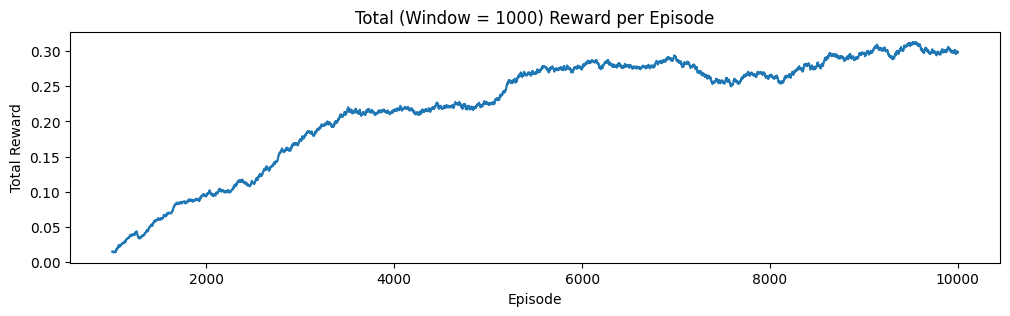

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
100%|██████████| 1000/1000 [00:06<00:00, 166.57it/s]


Success Rate: 35.8%


In [61]:
policy_net, target_net, episode_rewards = Q_net(policy_net, target_net, replay_buffer,
                                                random_env, n_actions, EPSILON_START, GAMMA,
                                                loss_fn, optimizer,
                                                NUM_EPISODES, BATCH_SIZE, TARGET_UPDATE, DECAY,
                                                DQN = False, verbose = False)

window = int(0.1 * NUM_EPISODES)
rewards_series = pd.Series(episode_rewards)
ma = rewards_series.rolling(window = window).mean()

plt.figure(figsize = (12, 3))
plt.plot(ma)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title(f'Total (Window = {window}) Reward per Episode')
plt.show()


rate = evaluate_model(random_env, policy_net, victory_logic, n_episodes = 1000)
print(f"\nSuccess Rate: {rate}%")

Dal grafico dei total rewards, e' evidente che l'agente stia imparando. Parte con media $0$, e sale fino a media $\sim 0.3$. Tuttavia, non c'e' modo di superare questa barriera. Da notare che che il success rate e' esattamente paragonabile a quello di SARSA e Q-learning, sintomo del fatto che questo success rate sia il massimo teorico.

Proviamo anche con DQN:

In [63]:
LEARNING_RATE = 0.0003
REPLAY_BUFFER_SIZE = 100000

EPSILON_START = 1.0
GAMMA = 0.99

NUM_EPISODES = 10000
BATCH_SIZE = 64
TARGET_UPDATE = 200
DECAY = 0.9995

input_shape = 6 # which is 2 (nodes) x 3 (features per node)
n_actions = random_env.action_space.n
policy_net = net(input_shape, n_actions).to(device)
target_net = net(input_shape, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict()) # start with the same nets

loss_fn = torch.nn.MSELoss()
optimizer = optim.Adam(policy_net.parameters(), lr = LEARNING_RATE)
replay_buffer = ReplayBuffer(buffer_max_dim = REPLAY_BUFFER_SIZE)

def victory_logic(episode_reward, terminated, truncated):
    if episode_reward > 0 and terminated:
        return True
    return False

100%|██████████| 10000/10000 [10:06<00:00, 16.49it/s]


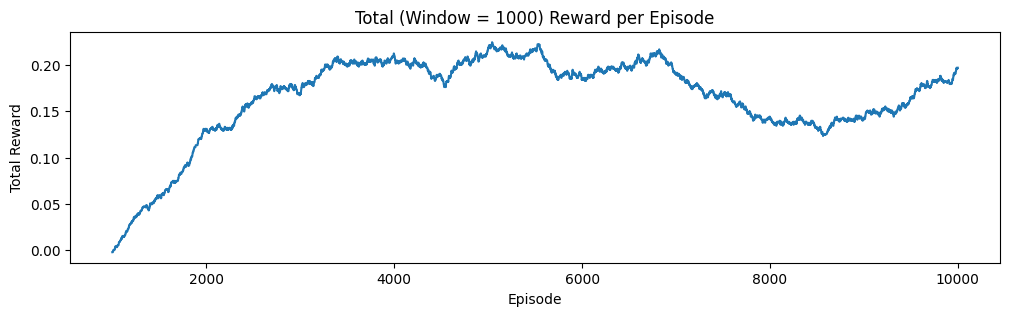

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
100%|██████████| 1000/1000 [00:20<00:00, 48.32it/s]


Success Rate: 16.900000000000002%


In [64]:
policy_net, target_net, episode_rewards = Q_net(policy_net, target_net, replay_buffer,
                                                random_env, n_actions, EPSILON_START, GAMMA,
                                                loss_fn, optimizer,
                                                NUM_EPISODES, BATCH_SIZE, TARGET_UPDATE, DECAY,
                                                DQN = True, verbose = False)

window = int(0.1 * NUM_EPISODES)
rewards_series = pd.Series(episode_rewards)
ma = rewards_series.rolling(window = window).mean()

plt.figure(figsize = (12, 3))
plt.plot(ma)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title(f'Total (Window = {window}) Reward per Episode')
plt.show()


rate = evaluate_model(random_env, policy_net, victory_logic, n_episodes = 1000)
print(f"\nSuccess Rate: {rate}%")

DQN rende evidentemente peggio (oltre a richiedere un training il doppio piu' lungo), e come noto da teoria, soffre di catastrophic forgetting.

### Maximal Attack

In [65]:
class net(nn.Module):
  def __init__(self, input_shape: int, num_actions: int):
    super().__init__()
    self.fc1 = nn.Linear(input_shape, 512)
    self.fc2 = nn.Linear(512, num_actions)
  def forward(self, X):
    X = torch.flatten(X, start_dim = 1)
    X = torch.relu(self.fc1(X))
    X = self.fc2(X) # do not put relu!
    return X

Iniziamo con DDQN. Dopo vari tentativi degli iperparametri (non riportati per non sporcare il notebook), i migliori sono i seguenti (uguali a quelli per Random Attack):

In [71]:
LEARNING_RATE = 0.0003
REPLAY_BUFFER_SIZE = 100000

EPSILON_START = 1.0
GAMMA = 0.99

NUM_EPISODES = 30000
BATCH_SIZE = 64
TARGET_UPDATE = 200
DECAY = 0.9995

input_shape = 6 # which is 2 (nodes) x 3 (features per node)
n_actions = maximal_env.action_space.n
policy_net = net(input_shape, n_actions).to(device)
target_net = net(input_shape, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict()) # start with the same nets

loss_fn = torch.nn.MSELoss()
optimizer = optim.Adam(policy_net.parameters(), lr = LEARNING_RATE)
replay_buffer = ReplayBuffer(buffer_max_dim = REPLAY_BUFFER_SIZE)

def victory_logic(episode_reward, terminated, truncated):
    if episode_reward > 0 and terminated:
        return True
    return False

100%|██████████| 30000/30000 [11:12<00:00, 44.63it/s]


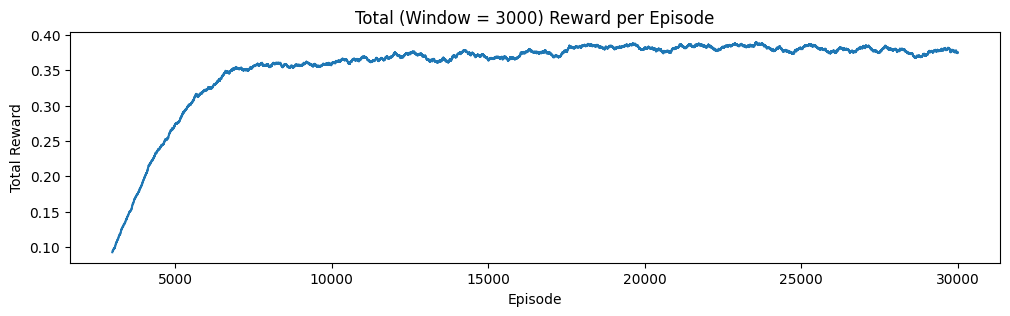

100%|██████████| 1000/1000 [00:03<00:00, 266.15it/s]


Success Rate: 41.5%


In [72]:
policy_net, target_net, episode_rewards = Q_net(policy_net, target_net, replay_buffer,
                                                maximal_env, n_actions, EPSILON_START, GAMMA,
                                                loss_fn, optimizer,
                                                NUM_EPISODES, BATCH_SIZE, TARGET_UPDATE, DECAY,
                                                DQN = False, verbose = False)

window = int(0.1 * NUM_EPISODES)
rewards_series = pd.Series(episode_rewards)
ma = rewards_series.rolling(window = window).mean()

plt.figure(figsize = (12, 3))
plt.plot(ma)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title(f'Total (Window = {window}) Reward per Episode')
plt.show()


rate = evaluate_model(maximal_env, policy_net, victory_logic, n_episodes = 1000)
print(f"\nSuccess Rate: {rate}%")

Qui non proviamo anche con DQN, visto che (come osservato in precedenza) e' molto piu' lento e per questo tipo di ambiente risponde peggio di DDQN.

# Discussion

Come osservato gia' piu' volte, l'ambiente della versione 12 (per entrambi i giochi) e' particolarmente competitivo. Questo e' chiaro dall'analisi baseline, dove si vede che il success rate e' dell'ordine del $\sim 0\%$.

Dopo il training, sia con SARSA (che con Q-learning) che con DDQN, si riesce ad arrivare ad un $\sim 35\%$, che non viene superato da nessuna combinazione degli iperparametri (nemmeno aumentando il numero di episodi totali, che e' comunque vicnolato dalle disponibilita' della GPU) o il reward-shaping. Ciononostante, gli algoritmi stanno funzionando e l'agente (di difesa) impara a difendersi *al meglio delle possibilita'*.